In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np

# from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from statsmodels.regression.linear_model import OLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
# import pydot
from statsmodels.api import add_constant
import itertools
from IPython.display import Image
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
# from skopt import BayesSearchCV
# from catboost import CatBoostRegressor
# import lightgbm as lgb

from google.colab import drive
drive.mount("/content/drive/")
%cd '/content/drive/MyDrive/ECE219/Project4/pp_gas_emission'



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive/
/content/drive/MyDrive/ECE219/Project4/pp_gas_emission


In [ ]:
!pip install scikit-optimize
!pip install catboost

# For LightGBM and Catboost
from skopt import BayesSearchCV
from catboost import CatBoostRegressor

     |████████████████████████████████| 100 kB 2.7 MB/s 
     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
# !pip install lightgbm

#Lets do somethings to get it working on GPU
! git clone --recursive https://github.com/Microsoft/LightGBM
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;
!cd ..

fatal: destination path 'LightGBM' already exists and is not an empty directory.
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory:

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")
%cd '/content/drive/MyDrive/ECE219/Project4/pp_gas_emission'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/ECE219/Project4/pp_gas_emission


In [ ]:
!pip install pydot
import pydot

In [ ]:
%cd './pp_gas_emission'

/Users/shruti/Desktop/Winter_2022Courses/219/project4/pp_gas_emission


#Gas Turbine CO and NOx Emission Data Set

In [ ]:
df_2011 = pd.read_csv('./gt_2011.csv')
samples,features = df_2011.shape
print('samples,features', samples,features)
df_2011['year']= 2011
df_2011

samples,features 7411 11


AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1     4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2     3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3     3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4     3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7406  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
7407  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
7408  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
7409  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
7410  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  year  
0     0.32663  81.952  2011  
1     0.44784  82.377  2011  
2     0.45144  83.776  2011  
3     0.23107  82.505  2011  
4     0.26747  82.028  2011  
...       ...     ...   ...  
7406  4.51860  79.559  2011  
7407  4.84700  79.917  2011  
7408  7.96320  90.912  2011  
7409  6.24940  93.227  2011  
7410  4.98160  92.498  2011  

[7411 rows x 12 columns]

In [ ]:
df_2012 = pd.read_csv('./gt_2012.csv')
samples,features = df_2012.shape
print('samples,features', samples,features)
df_2012['year']= 2012
df_2012

samples,features 7628 11


AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
7623  10.0370  1022.1  88.531  2.9192  23.641  1083.6  549.91  132.61  11.745   
7624   9.8921  1022.2  87.622  2.9415  23.859  1084.9  550.08  133.57  11.869   
7625   9.8723  1022.0  86.618  2.9309  23.817  1084.8  549.99  133.50  11.914   
7626  10.0260  1022.0  87.301  2.9363  23.831  1084.5  550.01  133.20  11.811   
7627  10.0590  1021.8  88.012  2.4579  19.526  1047.5  542.91  111.24  10.585   

          CO     NOX  year  
0     3.1547  82.722  2012  
1     3.2363  82.776  2012  
2     3.2012  82.468  2012  
3     3.1923  82.670  2012  
4     3.2484  82.311  2012  
...      ...     ...   ...  
7623  1.6560  76.068  2012  
7624  1.5549  74.930  2012  
7625  1.4093  75.041  2012  
7626  1.3963  74.460  2012  
7627  8.0107  86.066  2012  

[7628 rows x 12 columns]

In [ ]:
df_2013 = pd.read_csv('./gt_2013.csv')
samples,features = df_2013.shape
print('samples,features', samples,features)
df_2013['year']= 2013
df_2013

samples,features 7152 11


AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     9.3779  1020.1  90.262  2.3927  19.166  1043.6  541.16  110.16  10.564   
1     9.2985  1019.9  89.934  2.3732  19.119  1039.9  538.94  109.23  10.572   
2     9.1337  1019.8  89.868  2.3854  19.178  1041.0  539.47  109.62  10.543   
3     8.9715  1019.3  89.490  2.3825  19.180  1037.1  536.89  108.88  10.458   
4     9.0157  1019.1  89.099  2.4044  19.206  1043.5  541.25  110.09  10.464   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7147  4.8631  1027.0  81.084  4.2825  34.045  1100.0  529.98  168.38  14.290   
7148  4.5173  1027.4  80.813  4.2481  33.904  1100.1  530.47  168.07  14.344   
7149  4.2717  1027.9  80.380  4.2817  34.165  1099.9  529.56  168.55  14.395   
7150  4.0853  1028.6  78.907  4.2313  33.802  1100.1  530.61  167.98  14.343   
7151  4.2148  1029.4  70.679  4.2049  33.768  1100.0  530.97  167.30  14.291   

           CO      NOX  year  
0      9.3472   98.741  2013  
1     11.0160  104.290  2013  
2     10.7500  103.470  2013  
3     12.2870  108.810  2013  
4      9.8229  100.020  2013  
...       ...      ...   ...  
7147   1.2538   78.397  2013  
7148   1.0808   78.251  2013  
7149   1.0472   77.269  2013  
7150   1.0875   77.985  2013  
7151   1.1337   78.950  2013  

[7152 rows x 12 columns]

In [ ]:
df_2014 = pd.read_csv('./gt_2014.csv')
samples,features = df_2014.shape
print('samples,features', samples,features)
df_2014['year']= 2014
df_2014

samples,features 7158 11


AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     8.8358  1022.2  98.762  3.2422  23.152  1067.5  549.94  126.16  11.381   
1     9.0529  1021.8  97.464  3.2074  23.207  1067.9  549.80  126.51  11.476   
2     9.2464  1021.3  96.494  3.2051  23.296  1068.5  549.89  126.96  11.555   
3     9.3792  1020.9  95.912  3.2159  23.465  1069.6  549.94  127.83  11.539   
4     9.5757  1020.8  95.412  3.1898  23.205  1068.1  549.83  126.56  11.484   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7153  4.6043  1016.7  81.056  2.9386  23.766  1071.6  547.21  131.97  11.645   
7154  4.3537  1017.6  80.610  2.7612  21.786  1065.6  550.04  124.65  11.197   
7155  4.5199  1018.4  77.402  2.7753  21.921  1066.4  549.91  124.81  11.184   
7156  4.2789  1019.3  76.528  2.6798  21.200  1056.6  546.59  119.43  10.953   
7157  3.3834  1019.7  81.884  2.7124  21.328  1057.8  546.35  121.25  11.180   

          CO     NOX  year  
0     1.9157  68.292  2014  
1     2.0596  68.610  2014  
2     2.1621  68.324  2014  
3     2.1214  67.619  2014  
4     2.1549  66.499  2014  
...      ...     ...   ...  
7153  2.3176  74.015  2014  
7154  5.1828  81.561  2014  
7155  4.9228  82.496  2014  
7156  7.9450  91.232  2014  
7157  9.9270  91.144  2014  

[7158 rows x 12 columns]

In [ ]:
df_2015 = pd.read_csv('./gt_2015.csv')
samples,features = df_2015.shape
print('samples,features', samples,features)
df_2015['year']= 2015
df_2015

samples,features 7384 11


AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     1.95320  1020.1  84.985  2.5304  20.116  1048.7  544.92  116.27  10.799   
1     1.21910  1020.1  87.523  2.3937  18.584  1045.5  548.50  109.18  10.347   
2     0.94915  1022.2  78.335  2.7789  22.264  1068.8  549.95  125.88  11.256   
3     1.00750  1021.7  76.942  2.8170  23.358  1075.2  549.63  132.21  11.702   
4     1.28580  1021.6  76.732  2.8377  23.483  1076.2  549.68  133.58  11.737   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
7379  3.62680  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
7380  4.16740  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
7381  5.48200  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
7382  5.88370  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
7383  6.03920  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

           CO      NOX  year  
0      7.4491  113.250  2015  
1      6.4684  112.020  2015  
2      3.6335   88.147  2015  
3      3.1972   87.078  2015  
4      2.3833   82.515  2015  
...       ...      ...   ...  
7379  10.9930   89.172  2015  
7380  11.1440   88.849  2015  
7381  11.4140   96.147  2015  
7382   3.3134   64.738  2015  
7383  11.9810  109.240  2015  

[7384 rows x 12 columns]

In [ ]:
frames = [df_2011,df_2012,df_2013, df_2014, df_2015]
df_total=pd.concat(frames)
df_total
df_total.to_csv ('/content/drive/MyDrive/ECE219/Project4/pp_gas_emission/total_emission_csv')
df_total

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1     4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2     3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3     3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4     3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7379  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
7380  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
7381  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
7382  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
7383  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

            CO      NOX  year  
0      0.32663   81.952  2011  
1      0.44784   82.377  2011  
2      0.45144   83.776  2011  
3      0.23107   82.505  2011  
4      0.26747   82.028  2011  
...        ...      ...   ...  
7379  10.99300   89.172  2015  
7380  11.14400   88.849  2015  
7381  11.41400   96.147  2015  
7382   3.31340   64.738  2015  
7383  11.98100  109.240  2015  

[36733 rows x 12 columns]

In [ ]:
df_total = pd.read_csv('./total_emission_csv')


dict_cut = {2011: 0, 2012:1, 2013: 2, 2014:3, 2015:4}
df_total= df_total.replace({'year':dict_cut})
df_total.to_csv ('/content/drive/MyDrive/ECE219/Project4/pp_gas_emission/total_emission_csv')

# df_total = df_total.rename(columns={'Unnamed: 0	': 'Unnamed'})
# df_total=df_total.drop('Unnamed: 0',1)
df_total


Unnamed: 0      AT      AP      AH    AFDP    GTEP     TIT     TAT  \
0               0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83   
1               1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05   
2               2  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19   
3               3  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17   
4               4  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00   
...           ...     ...     ...     ...     ...     ...     ...     ...   
36728        7379  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59   
36729        7380  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28   
36730        7381  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48   
36731        7382  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11   
36732        7383  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23   

          TEY     CDP        CO      NOX  year  
0      134.67  11.898   0.32663   81.952     0  
1      134.67  11.892   0.44784   82.377     0  
2      135.10  12.042   0.45144   83.776     0  
3      135.03  11.990   0.23107   82.505     0  
4      134.67  11.910   0.26747   82.028     0  
...       ...     ...       ...      ...   ...  
36728  109.08  10.411  10.99300   89.172     4  
36729  108.79  10.344  11.14400   88.849     4  
36730  107.81  10.462  11.41400   96.147     4  
36731  131.41  11.771   3.31340   64.738     4  
36732  125.41  11.462  11.98100  109.240     4  

[36733 rows x 13 columns]

In [ ]:
df_total = df_total.rename(columns={'Unnamed: 0	': 'Unnamed'})
df_total=df_total.drop('Unnamed: 0',1)
df_total

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

             CO      NOX  year  
0       0.32663   81.952     0  
1       0.44784   82.377     0  
2       0.45144   83.776     0  
3       0.23107   82.505     0  
4       0.26747   82.028     0  
...         ...      ...   ...  
36728  10.99300   89.172     4  
36729  11.14400   88.849     4  
36730  11.41400   96.147     4  
36731   3.31340   64.738     4  
36732  11.98100  109.240     4  

[36733 rows x 12 columns]

In [ ]:
df_total.to_csv ('/content/drive/MyDrive/ECE219/Project4/pp_gas_emission/total_emission_csv')

In [2]:
df_total = pd.read_csv('./total_emission_csv')
df_total = df_total.rename(columns={'Unnamed: 0	': 'Unnamed'})
df_total=df_total.drop('Unnamed: 0',1)
df_total

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

             CO      NOX  year  
0       0.32663   81.952     0  
1       0.44784   82.377     0  
2       0.45144   83.776     0  
3       0.23107   82.505     0  
4       0.26747   82.028     0  
...         ...      ...   ...  
36728  10.99300   89.172     4  
36729  11.14400   88.849     4  
36730  11.41400   96.147     4  
36731   3.31340   64.738     4  
36732  11.98100  109.240     4  

[36733 rows x 12 columns]

In [3]:
# drop a column , that column should not be used as a feature

df_total=df_total.drop('NOX',1)
df_total



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

             CO  year  
0       0.32663     0  
1       0.44784     0  
2       0.45144     0  
3       0.23107     0  
4       0.26747     0  
...         ...   ...  
36728  10.99300     4  
36729  11.14400     4  
36730  11.41400     4  
36731   3.31340     4  
36732  11.98100     4  

[36733 rows x 11 columns]

In [4]:
cols = list(df_total)
a, b = cols.index('CO'), cols.index('year')
cols[b], cols[a] = cols[a], cols[b]
df_total = df_total[cols]

In [5]:


###### dataset before standardisation
df_total

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

       year        CO  
0         0   0.32663  
1         0   0.44784  
2         0   0.45144  
3         0   0.23107  
4         0   0.26747  
...     ...       ...  
36728     4  10.99300  
36729     4  11.14400  
36730     4  11.41400  
36731     4   3.31340  
36732     4  11.98100  

[36733 rows x 11 columns]

##Q1

In [7]:
#standardisation of the dataset

In [6]:
scale = StandardScaler()
df_total_scaled = scale.fit_transform(df_total)

In [7]:
df_total_scaled = pd.DataFrame(df_total_scaled)
df_total_scaled

0         1         2         3         4         5         6   \
0     -1.762362  0.871052  0.401627 -0.451875 -0.377702  0.272119  0.536589   
1     -1.801920  0.809164  0.440351 -0.458207 -0.384376  0.266417  0.568742   
2     -1.854113  0.824636  0.483432 -0.442831 -0.375081  0.289227  0.589203   
3     -1.875718  0.809164  0.523263 -0.445415 -0.393909  0.289227  0.586280   
4     -1.874644  0.731804  0.505837 -0.448904 -0.392479  0.255012  0.561434   
...         ...       ...       ...       ...       ...       ...       ...   
36728 -1.891401  2.387315  1.060287 -0.981255 -1.543602 -2.533516 -0.667691   
36729 -1.818812  2.402787  1.118097 -0.947401 -1.560524 -2.499301 -0.566847   
36730 -1.642292  2.387315  1.199903 -0.791702 -1.598418 -2.476491 -0.391466   
36731 -1.588354  2.418260  1.129438  0.074403 -0.476847 -0.258214  0.577511   
36732 -1.567474  2.433732  1.153434 -0.065016 -0.724469 -0.771440  0.302748   

             7         8         9         10  
0      0.074502 -0.149273 -1.399443 -0.904182  
1      0.074502 -0.154783 -1.399443 -0.850611  
2      0.102033 -0.017015 -1.399443 -0.849020  
3      0.097551 -0.064774 -1.399443 -0.946415  
4      0.074502 -0.138251 -1.399443 -0.930328  
...         ...       ...       ...       ...  
36728 -1.563948 -1.515021  1.419550  3.809943  
36729 -1.582516 -1.576558  1.419550  3.876679  
36730 -1.645262 -1.468179  1.419550  3.996008  
36731 -0.134226 -0.265917  1.419550  0.415856  
36732 -0.518388 -0.549721  1.419550  4.246601  

[36733 rows x 11 columns]

In [10]:
# df_total_scaled= df_total_scaled.join(df_total['CO'])

In [8]:
df_total_scaled

0         1         2         3         4         5         6   \
0     -1.762362  0.871052  0.401627 -0.451875 -0.377702  0.272119  0.536589   
1     -1.801920  0.809164  0.440351 -0.458207 -0.384376  0.266417  0.568742   
2     -1.854113  0.824636  0.483432 -0.442831 -0.375081  0.289227  0.589203   
3     -1.875718  0.809164  0.523263 -0.445415 -0.393909  0.289227  0.586280   
4     -1.874644  0.731804  0.505837 -0.448904 -0.392479  0.255012  0.561434   
...         ...       ...       ...       ...       ...       ...       ...   
36728 -1.891401  2.387315  1.060287 -0.981255 -1.543602 -2.533516 -0.667691   
36729 -1.818812  2.402787  1.118097 -0.947401 -1.560524 -2.499301 -0.566847   
36730 -1.642292  2.387315  1.199903 -0.791702 -1.598418 -2.476491 -0.391466   
36731 -1.588354  2.418260  1.129438  0.074403 -0.476847 -0.258214  0.577511   
36732 -1.567474  2.433732  1.153434 -0.065016 -0.724469 -0.771440  0.302748   

             7         8         9         10  
0      0.074502 -0.149273 -1.399443 -0.904182  
1      0.074502 -0.154783 -1.399443 -0.850611  
2      0.102033 -0.017015 -1.399443 -0.849020  
3      0.097551 -0.064774 -1.399443 -0.946415  
4      0.074502 -0.138251 -1.399443 -0.930328  
...         ...       ...       ...       ...  
36728 -1.563948 -1.515021  1.419550  3.809943  
36729 -1.582516 -1.576558  1.419550  3.876679  
36730 -1.645262 -1.468179  1.419550  3.996008  
36731 -0.134226 -0.265917  1.419550  0.415856  
36732 -0.518388 -0.549721  1.419550  4.246601  

[36733 rows x 11 columns]

## Q2

In [ ]:
## heatmap

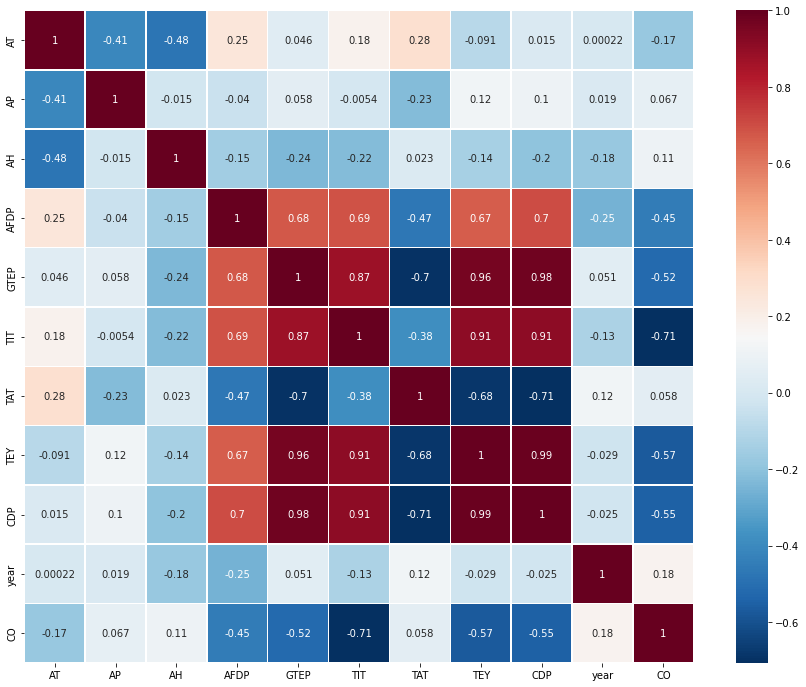

In [9]:
corr = df_total.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, linewidths=0.5,cmap="RdBu_r",annot=True)
plt.savefig('Q2gas.png',dpi=300,bbox_inches='tight')

##Q3

In [10]:
print(df_total.columns)

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'year',
       'CO'],
      dtype='object')


AT


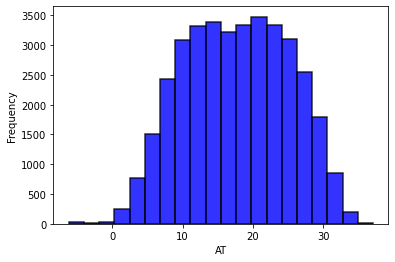

AP


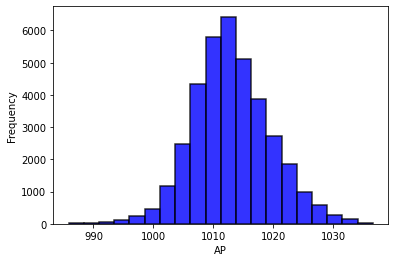

AH


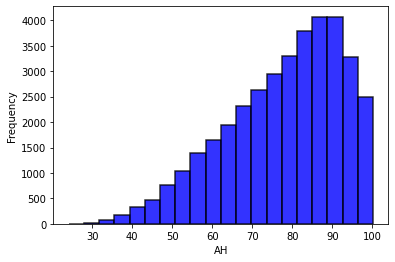

AFDP


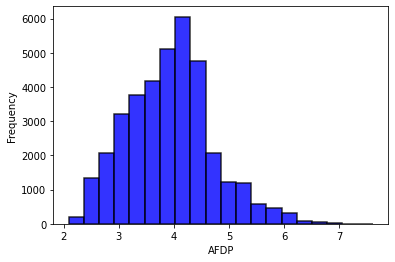

GTEP


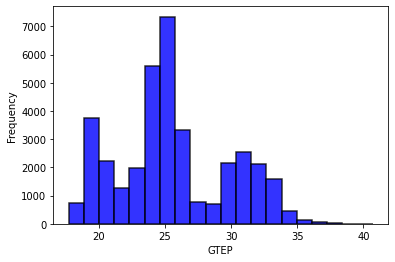

TIT


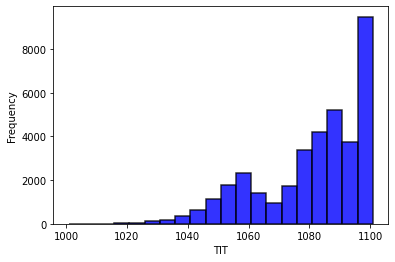

TAT


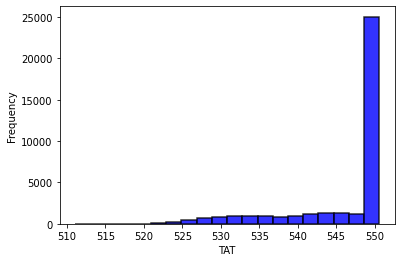

TEY


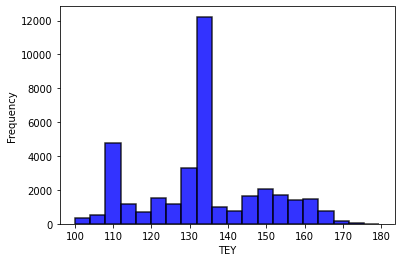

CDP


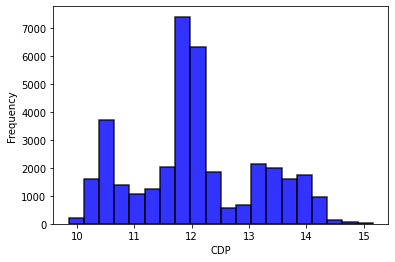

In [14]:

numerical_features = df_total.columns [:9]
for i in numerical_features:
    print(i)
    plt.hist(df_total[i],bins=20, edgecolor='k', facecolor='b', linewidth=1.5, alpha=0.8)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    
    plt.savefig('Q3gas{}.png'.format(i),dpi=300,bbox_inches='tight')
    plt.show()

##Q4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


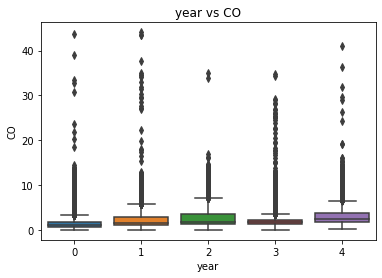

In [15]:

categorical_features = ['year']
for i in categorical_features:
        sns.boxplot(df_total[i], df_total.iloc[:,-1], order=list(set(df_total[i])))
        plt.title('year' +' vs '+ 'CO')
        plt.savefig('Q4gas{}.png'.format(i),dpi=300,bbox_inches='tight')
        plt.show()

##Q6

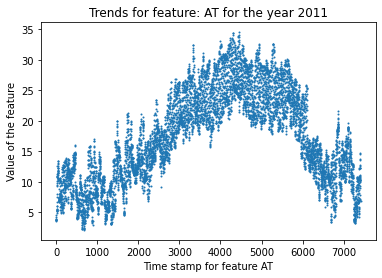

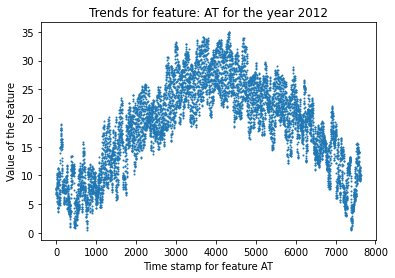

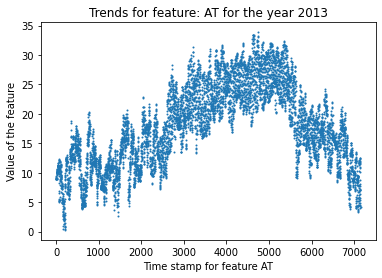

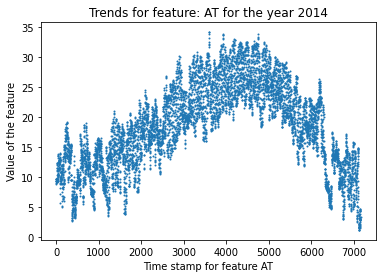

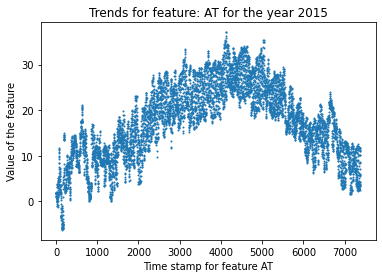

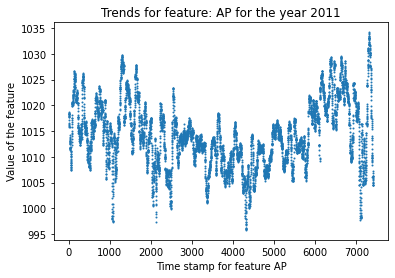

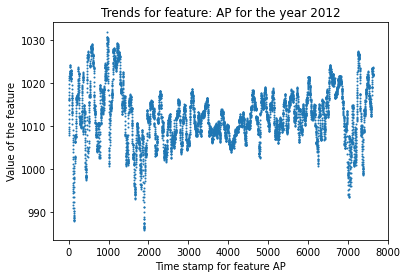

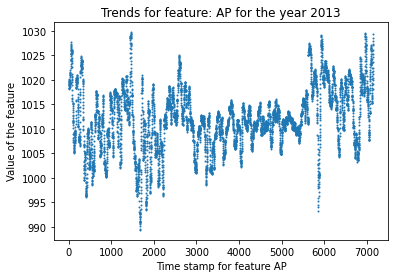

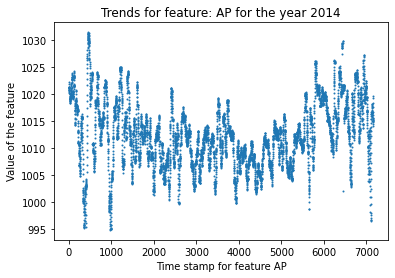

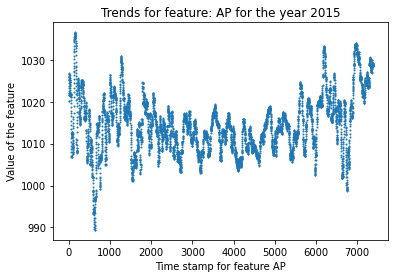

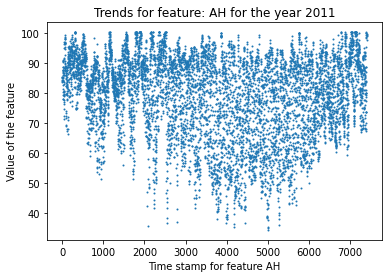

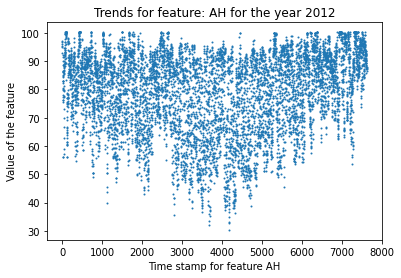

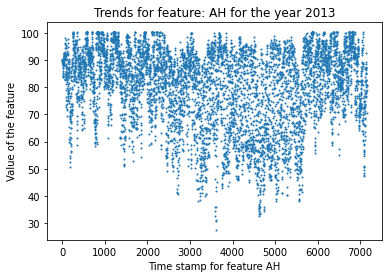

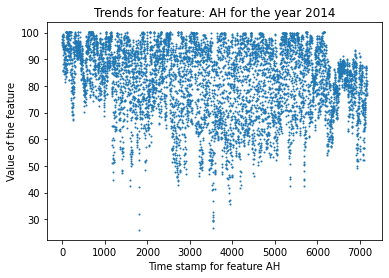

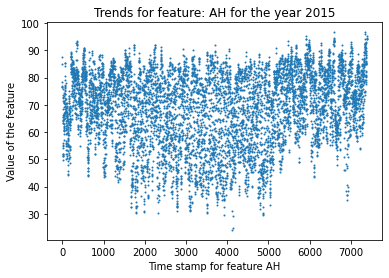

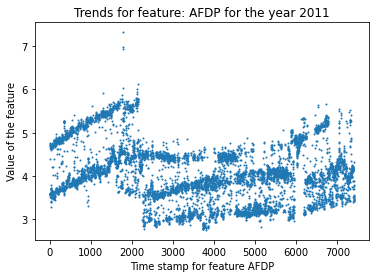

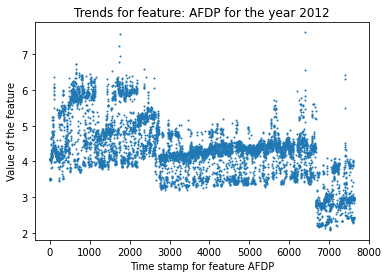

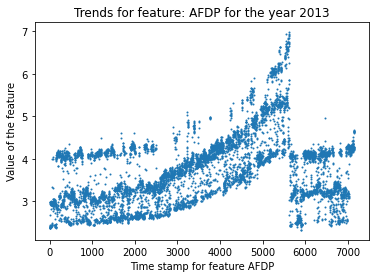

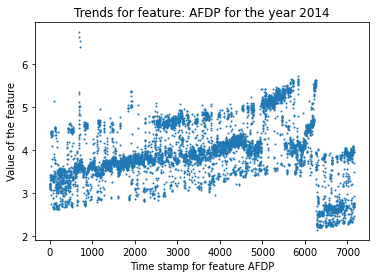

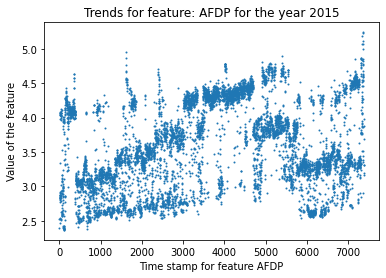

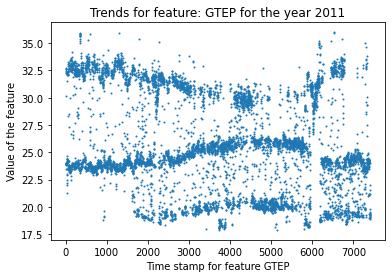

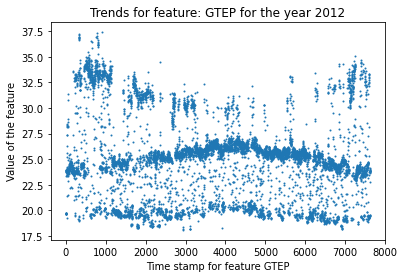

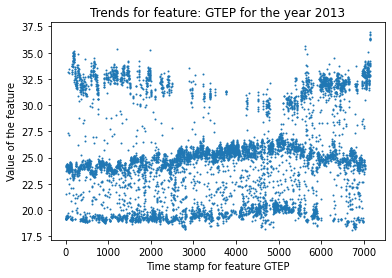

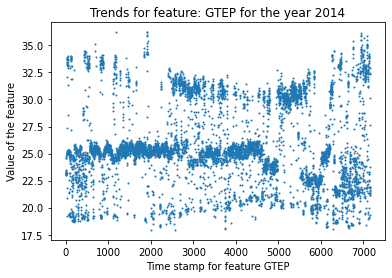

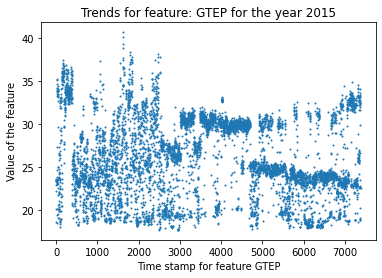

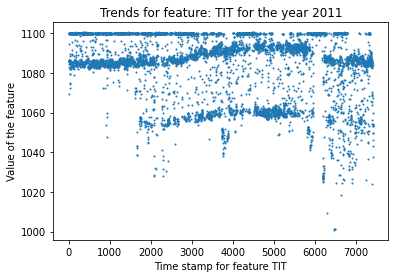

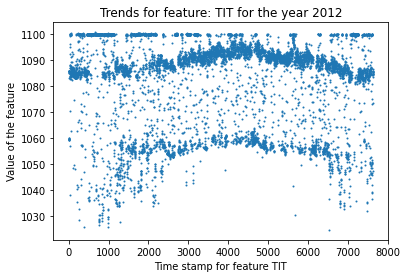

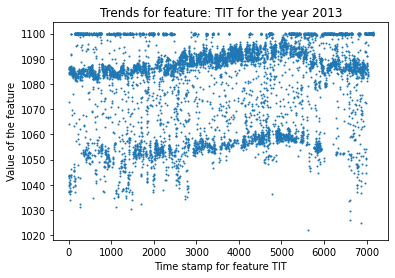

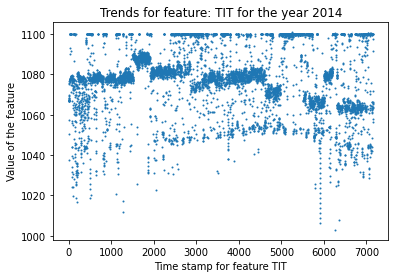

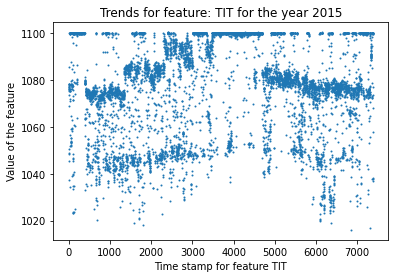

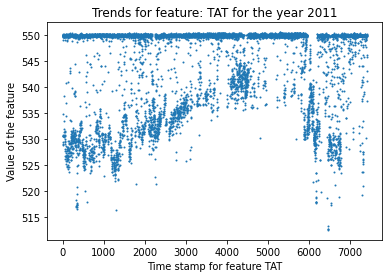

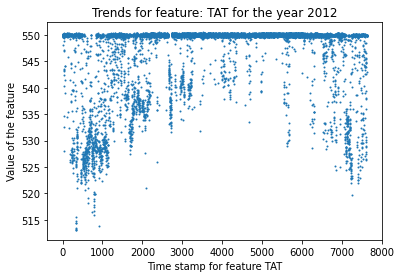

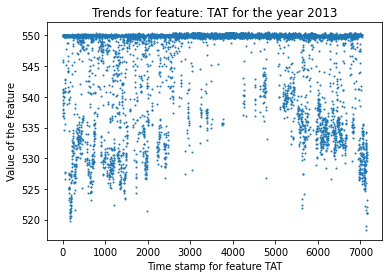

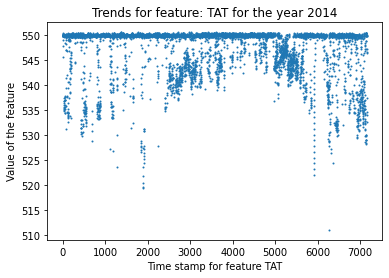

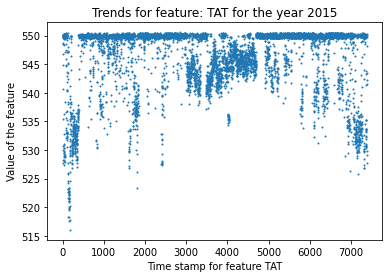

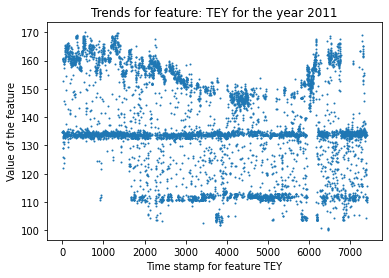

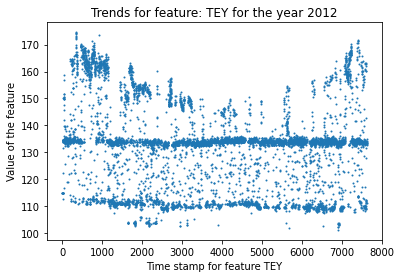

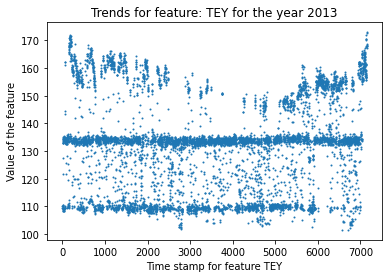

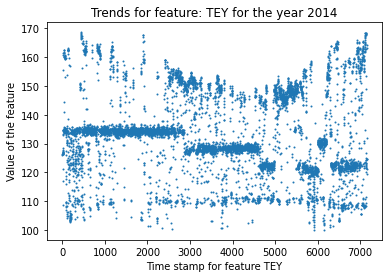

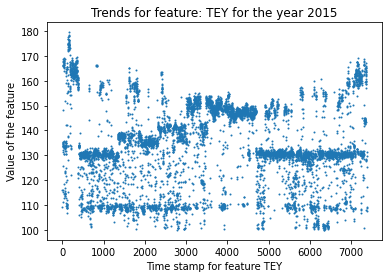

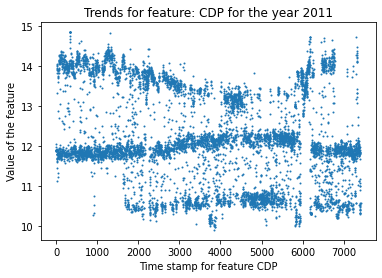

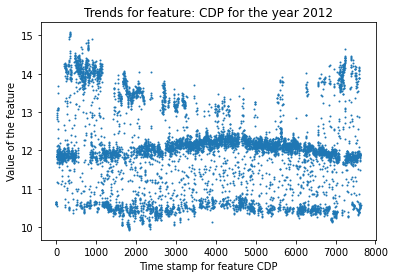

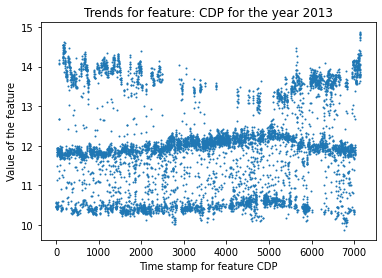

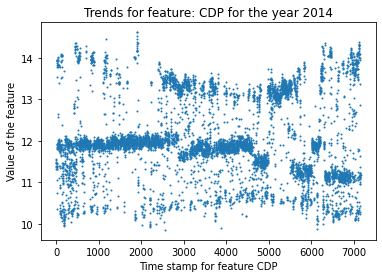

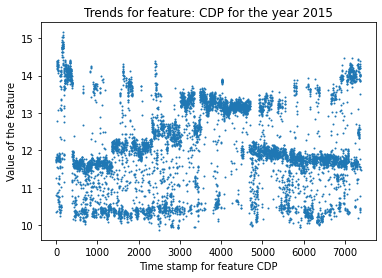

In [14]:
i=0
feature_list=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']
year_list=['2011','2012','2013','2014','2015']
X_np_gt_norm_le= df_total.to_numpy()
for feature in feature_list:
  j=0
  for year in year_list:
    plt.rcParams["figure.figsize"] = (6,4)
    plt.figure(i+1)
    plt.xlabel("Time stamp for feature "+feature)
    plt.ylabel("Value of the feature")
    plt.title("Trends for feature: "+feature+ " for the year "+year)
    if not (feature =='CO level' ):
      df_to_plt= df_total.loc[df_total['year']==j]
      #print(df_to_plt.shape)
      plt.scatter(np.arange(0,df_to_plt.shape[0]),df_to_plt[feature],s=1)
      # else:
        
      #     # idxs=np.argwhere(X_np_gt_norm_le[:,11]==j)
      #     # #print("CO idxs is",idxs)
      #     # #print(df_to_plt.shape)
      #     # plt.scatter(np.arange(0,idxs.shape[0]),y_co_norm[idxs],s=1)
        

    j=j+1
  #plt.legend(loc='best')
    plt.savefig('./figure/Q6'+feature+year+'trend.png')
    plt.show()
  i+=1


##Q7

In [11]:
x_standard = df_total_scaled.iloc[:,:10]
y_standard = df_total_scaled.iloc[:,10]

MutualInfo = mutual_info_regression(x_standard, y_standard)
Fscore = f_regression(x_standard, y_standard)


In [12]:
print(MutualInfo)
print(Fscore)

[0.10494351 0.04280742 0.0256036  0.27864434 0.44538099 0.53947185
 0.16128684 0.49572705 0.47423939 0.12319003]
(array([ 1151.22090472,   165.87752857,   422.08013102,  9245.08377364,
       13534.97054407, 36558.68834551,   125.50084238, 17660.02276429,
       16015.41677409,  1208.14433729]), array([1.70122203e-248, 7.10695129e-038, 2.88245714e-093, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 4.40808602e-029, 0.00000000e+000,
       0.00000000e+000, 1.75586548e-260]))


In [13]:
gas_RMSE_MIR = []
gas_RMSE_FR = []

gas_RMSE_MIR_RR = []
gas_RMSE_FR_RR = []


gas_RMSE_MIR_LR = []
gas_RMSE_FR_LR = []



for i in range(1,x_standard.shape[1]+1):
    print('Testing LR, gas dataset for k = ', i)
    XgasCur_M = SelectKBest(score_func=mutual_info_regression, k=i).fit_transform(x_standard, y_standard)
    XgasCur_F = SelectKBest(score_func=f_regression, k=i).fit_transform(x_standard, y_standard)
    
    gasOut = cross_validate(LinearRegression(), XgasCur_M, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_MIR.append(gasOut['test_neg_root_mean_squared_error'].mean())
    gasOut = cross_validate(LinearRegression(), XgasCur_F, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_FR.append(gasOut['test_neg_root_mean_squared_error'].mean())

    
    
    

Testing LR, gas dataset for k =  1
Testing LR, gas dataset for k =  2
Testing LR, gas dataset for k =  3
Testing LR, gas dataset for k =  4
Testing LR, gas dataset for k =  5
Testing LR, gas dataset for k =  6
Testing LR, gas dataset for k =  7
Testing LR, gas dataset for k =  8
Testing LR, gas dataset for k =  9
Testing LR, gas dataset for k =  10


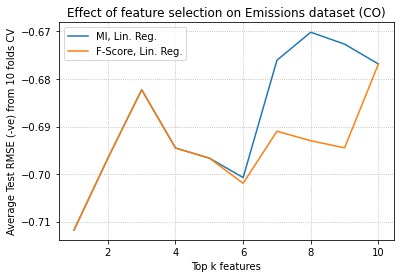

In [14]:
plt.plot(np.arange(1,len(gas_RMSE_MIR)+1,1),gas_RMSE_MIR)
plt.plot(np.arange(1,len(gas_RMSE_FR)+1,1),gas_RMSE_FR)
plt.legend(['MI, Lin. Reg.','F-Score, Lin. Reg.'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE (-ve) from 10 folds CV')
plt.title('Effect of feature selection on Emissions dataset (CO)')
plt.savefig('Q7.png',dpi=300,bbox_inches='tight')
plt.show()

In [15]:
# selecting 4 features makes sense from this graph is comparable to selecting all features in the model
k_val = 4

## Q8 - Q11

In [16]:
gas_RMSE_MIR = []
gas_RMSE_FR = []

gas_RMSE_MIR_RR = []
gas_RMSE_FR_RR = []


gas_RMSE_MIR_LR = []
gas_RMSE_FR_LR = []



for i in range(1,x_standard.shape[1]):
    print('Testing LR, gas dataset for k = ', i)
    XgasCur_M = SelectKBest(score_func=mutual_info_regression, k=i).fit_transform(x_standard, y_standard)
    XgasCur_F = SelectKBest(score_func=f_regression, k=i).fit_transform(x_standard, y_standard)
    
    gasOut = cross_validate(LinearRegression(), XgasCur_M, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_MIR.append(gasOut['test_neg_root_mean_squared_error'].mean())
    gasOut = cross_validate(LinearRegression(), XgasCur_F, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_FR.append(gasOut['test_neg_root_mean_squared_error'].mean())

    
    print('Testing RR, gas dataset for k = ', i)
    gasOut = cross_validate(Ridge(), XgasCur_M, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_MIR_RR.append(gasOut['test_neg_root_mean_squared_error'].mean())
    gasOut = cross_validate(Ridge(), XgasCur_F, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_FR_RR.append(gasOut['test_neg_root_mean_squared_error'].mean())
    
    print('Testing LaR, gas dataset for k = ', i)
    gasOut = cross_validate(Lasso(), XgasCur_M, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_MIR_LR.append(gasOut['test_neg_root_mean_squared_error'].mean())
    gasOut = cross_validate(Lasso(), XgasCur_F, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_FR_LR.append(gasOut['test_neg_root_mean_squared_error'].mean())

Testing LR, gas dataset for k =  1
Testing RR, gas dataset for k =  1
Testing LaR, gas dataset for k =  1
Testing LR, gas dataset for k =  2
Testing RR, gas dataset for k =  2
Testing LaR, gas dataset for k =  2
Testing LR, gas dataset for k =  3
Testing RR, gas dataset for k =  3
Testing LaR, gas dataset for k =  3
Testing LR, gas dataset for k =  4
Testing RR, gas dataset for k =  4
Testing LaR, gas dataset for k =  4
Testing LR, gas dataset for k =  5
Testing RR, gas dataset for k =  5
Testing LaR, gas dataset for k =  5
Testing LR, gas dataset for k =  6
Testing RR, gas dataset for k =  6
Testing LaR, gas dataset for k =  6
Testing LR, gas dataset for k =  7
Testing RR, gas dataset for k =  7
Testing LaR, gas dataset for k =  7
Testing LR, gas dataset for k =  8
Testing RR, gas dataset for k =  8
Testing LaR, gas dataset for k =  8
Testing LR, gas dataset for k =  9
Testing RR, gas dataset for k =  9
Testing LaR, gas dataset for k =  9


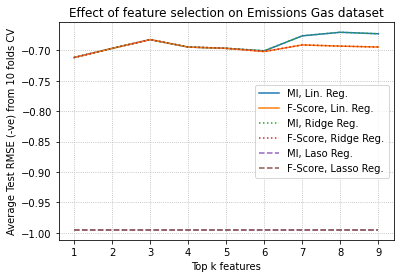

In [17]:
plt.plot(np.arange(1,len(gas_RMSE_MIR)+1,1),gas_RMSE_MIR)
plt.plot(np.arange(1,len(gas_RMSE_FR)+1,1),gas_RMSE_FR)
plt.plot(np.arange(1,len(gas_RMSE_MIR_RR)+1,1),gas_RMSE_MIR_RR,':')
plt.plot(np.arange(1,len(gas_RMSE_FR_RR)+1,1),gas_RMSE_FR_RR,':')
plt.plot(np.arange(1,len(gas_RMSE_MIR_LR)+1,1),gas_RMSE_MIR_LR,'--')
plt.plot(np.arange(1,len(gas_RMSE_FR_LR)+1,1),gas_RMSE_FR_LR,'--')
plt.legend(['MI, Lin. Reg.','F-Score, Lin. Reg.','MI, Ridge Reg.',
            'F-Score, Ridge Reg.','MI, Laso Reg.','F-Score, Lasso Reg.'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE (-ve) from 10 folds CV')
plt.title('Effect of feature selection on Emissions Gas dataset')
plt.savefig('Q9a.png',dpi=300,bbox_inches='tight')
plt.show()

In [18]:
k_val = 4

x_nostandard = df_total.iloc[:,:10]
y_nostandard = df_total.iloc[:,10]


XgasCur_F = SelectKBest(score_func=f_regression, k=k_val).fit_transform(x_nostandard,y_standard)
XgasCur_MIR = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(x_nostandard, y_standard)
XgasCur_FS = SelectKBest(score_func=f_regression, k=k_val).fit_transform(x_standard, y_standard)
XgasCur_MIRS = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(x_standard, y_standard)


## Linear Regression

In [ ]:
gasOut = cross_validate(LinearRegression(), XgasCur_F, y_standard, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• No standardization, gas dataset, F1, linear regression: Test=',gasOut['test_neg_root_mean_squared_error'].mean(),',Train=',gasOut['train_neg_root_mean_squared_error'].mean())
gasOut = cross_validate(LinearRegression(), XgasCur_MIR, y_standard, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• No standardization, gas dataset, MI, linear regression: Test=',gasOut['test_neg_root_mean_squared_error'].mean(),',Train=',gasOut['train_neg_root_mean_squared_error'].mean())
gasOut = cross_validate(LinearRegression(), XgasCur_FS, y_standard, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• Standardization, gas dataset, F1, linear regression:  Test=',gasOut['test_neg_root_mean_squared_error'].mean(),',Train=',gasOut['train_neg_root_mean_squared_error'].mean())
gasOut = cross_validate(LinearRegression(), XgasCur_MIRS, y_standard, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• Standardization, gas dataset, MI, linear regression: Test=',gasOut['test_neg_root_mean_squared_error'].mean(),',Train=',gasOut['train_neg_root_mean_squared_error'].mean())



• No standardization, gas dataset, F1, linear regression: Test= -0.6945211163107976 ,Train= -0.6684353832173542
• No standardization, gas dataset, MI, linear regression: Test= -0.6945211163107976 ,Train= -0.6684353832173542
• Standardization, gas dataset, F1, linear regression:  Test= -0.6945211163108104 ,Train= -0.6684353832173542
• Standardization, gas dataset, MI, linear regression: Test= -0.6945211163108104 ,Train= -0.6684353832173542


## Ridge Regression

In [ ]:
pipe_RR = Pipeline([('model', Ridge(random_state=42))])
param_grid = {
    'model__alpha': [10.0**x for x in np.arange(-3,3)]
}

In [ ]:
print("Testing Gas..\n")
gridgasRR_F = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10,  verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_F, y_standard)
gridgasRR_FS = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10,  verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_FS, y_standard)
gridgasRR_M = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_MIR, y_standard)
gridgasRR_MS = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10,  verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_MIRS, y_standard)

Testing Gas..

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [ ]:
print('No standardization, gas dataset, F1, ridge reg., Test RMSE:',gridgasRR_F.best_score_,
      ',alpha:',gridgasRR_F.best_params_,'train RMSE',max(gridgasRR_F.cv_results_['mean_train_score']))
print('Standardization, gas dataset, F1, ridge reg., Test RMSE:',gridgasRR_FS.best_score_,
      ',alpha:',gridgasRR_FS.best_params_,'train RMSE',max(gridgasRR_FS.cv_results_['mean_train_score']))
print('No standardization, gas dataset, MI, ridge reg., Test RMSE:',gridgasRR_M.best_score_,
      ',alpha:',gridgasRR_F.best_params_,'train RMSE',max(gridgasRR_M.cv_results_['mean_train_score']))
print('Standardization, gas dataset, MI, ridge reg., Test RMSE:',gridgasRR_MS.best_score_,
      ',alpha:',gridgasRR_MS.best_params_,'train RMSE',max(gridgasRR_MS.cv_results_['mean_train_score']))


No standardization, gas dataset, F1, ridge reg., Test RMSE: -0.6875803306682531 ,alpha: {'model__alpha': 100.0} train RMSE -0.6684353832174031
Standardization, gas dataset, F1, ridge reg., Test RMSE: -0.6857940937289274 ,alpha: {'model__alpha': 100.0} train RMSE -0.6684353832174869
No standardization, gas dataset, MI, ridge reg., Test RMSE: -0.6875803306682531 ,alpha: {'model__alpha': 100.0} train RMSE -0.6684353832174031
Standardization, gas dataset, MI, ridge reg., Test RMSE: -0.6857940937289274 ,alpha: {'model__alpha': 100.0} train RMSE -0.6684353832174869


## Lasso Regression

In [ ]:
pipe_LAR = Pipeline([('model', Lasso(random_state=42))])
param_grid = {
    'model__alpha': [10.0**x for x in np.arange(-3,3)]
}

In [ ]:
print("Testing gas..\n")
gridgasLAR_F = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_F, y_standard)
gridgasLAR_FS = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_FS, y_standard)
gridgasLAR_M = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_MIR, y_standard)
gridgasLAR_MS = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_MIRS, y_standard)


Testing gas..

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [ ]:
print('No standardization, gas dataset, F1, lasso reg., Test RMSE:',gridgasLAR_F.best_score_,
      ',alpha:',gridgasLAR_F.best_params_,'train RMSE',max(gridgasLAR_F.cv_results_['mean_train_score']))
print('Standardization, gas dataset, F1, lasso reg., Test RMSE:',gridgasLAR_FS.best_score_,
      ',alpha:',gridgasLAR_FS.best_params_,'train RMSE',max(gridgasLAR_FS.cv_results_['mean_train_score']))
print('No standardization, gas dataset, MI, lasso reg., Test RMSE:',gridgasLAR_M.best_score_,
      ',alpha:',gridgasLAR_F.best_params_,'train RMSE',max(gridgasLAR_F.cv_results_['mean_train_score']))
print('Standardization, gas dataset, MI, lasso reg., Test RMSE:',gridgasLAR_MS.best_score_,
      ',alpha:',gridgasLAR_MS.best_params_,'train RMSE',max(gridgasLAR_MS.cv_results_['mean_train_score']))

No standardization, gas dataset, F1, lasso reg., Test RMSE: -0.6867907749720457 ,alpha: {'model__alpha': 0.01} train RMSE -0.66848987709981
Standardization, gas dataset, F1, lasso reg., Test RMSE: -0.6853242036599699 ,alpha: {'model__alpha': 0.01} train RMSE -0.6686102781801911
No standardization, gas dataset, MI, lasso reg., Test RMSE: -0.6867907749720457 ,alpha: {'model__alpha': 0.01} train RMSE -0.66848987709981
Standardization, gas dataset, MI, lasso reg., Test RMSE: -0.6853242036599699 ,alpha: {'model__alpha': 0.01} train RMSE -0.6686102781801911


## p values

In [26]:
p_ex = OLS(y_standard, df_total.loc[:, df_total.columns != 'CO']).fit()
print(p_ex.pvalues.sort_values(ascending=True))


AT       0.000000e+00
TIT      0.000000e+00
TAT      0.000000e+00
TEY      0.000000e+00
year     0.000000e+00
AP      2.077336e-122
CDP      8.860701e-46
GTEP     1.214533e-22
AH       5.985337e-02
AFDP     8.178496e-01
dtype: float64


array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 2.07733598e-122, 8.86070116e-046, 1.21453300e-022,
       5.98533707e-002, 8.17849574e-001])

## Q12- Q14

In [ ]:
degree_list = np.arange(1,6,1)

pipe_PR_gas = Pipeline([
    ('PR', PolynomialFeatures()),
    ('model', Ridge(random_state=42))
])

param_grid_PR = {
    'PR__degree': degree_list,
    'model__alpha': [10.0**x for x in np.arange(-3,3)]
    
}

In [ ]:
gridgas_PR = GridSearchCV(pipe_PR_gas, param_grid=param_grid_PR, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_F,y_standard)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
print(gridgas_PR.best_estimator_)

Pipeline(steps=[('PR', PolynomialFeatures()),
                ('model', Ridge(alpha=10.0, random_state=42))])


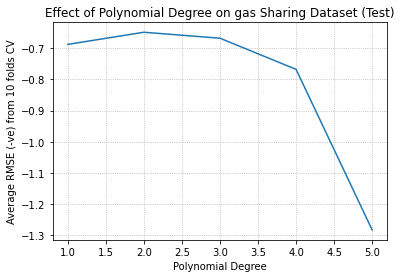

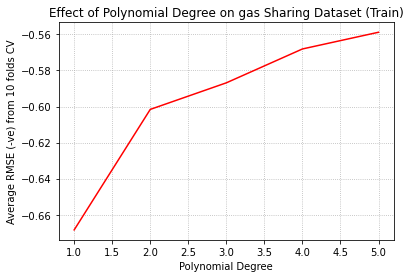

In [ ]:
poly_result = pd.DataFrame(gridgas_PR.cv_results_)[['mean_test_score','mean_train_score','param_PR__degree','param_model__alpha']]
gas_score = []
gas_train = []
gas_alpha = []
for i in degree_list:
    gas_score.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_test_score)
    gas_train.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_train_score)
    gas_alpha.append(float(poly_result['param_model__alpha'][
        (poly_result.loc[poly_result['param_PR__degree'] == i])
        [['mean_test_score']].idxmax()].to_numpy()))
plt.plot(degree_list,gas_score)
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on gas Sharing Dataset (Test)')
plt.savefig('Q15a.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(degree_list,gas_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on gas Sharing Dataset (Train)')
plt.savefig('Q13.png',dpi=300,bbox_inches='tight')
plt.show()

## Most Salient Features

In [ ]:
chY = SelectKBest(score_func=f_regression, k=4)
XTranscode_Test = chY.fit_transform(df_total.loc[:, df_total.columns != 'CO'], df_total.iloc[:,10])
column_names = df_total.loc[:, df_total.columns != 'CO'].columns[chY.get_support()]
print(column_names)
b_params = gridgas_PR.best_estimator_.get_params()
b_coefs = b_params['model'].coef_
b_feature_name = list(column_names)
b_names = b_params['PR'].get_feature_names(b_feature_name)
b_sorted_indice = np.argsort(-abs(b_coefs))
salient_features =[b_names[i] for i in b_sorted_indice[:5]]
print ('Top 5 Salient features (gas):',salient_features)

Index(['GTEP', 'TIT', 'TEY', 'CDP'], dtype='object')
Top 5 Salient features (gas): ['TIT', 'CDP^2', 'GTEP', 'TEY', 'CDP']


In [ ]:
chY = SelectKBest(score_func=f_regression, k=9)
XTranscode_Test = chY.fit_transform(df_total.loc[:, df_total.columns != 'CO'], df_total.iloc[:,10])
column_names = df_total.loc[:, df_total.columns != 'CO'].columns[chY.get_support()]
print(column_names)
b_params = gridgas_PR.best_estimator_.get_params()
b_coefs = b_params['model'].coef_
b_feature_name = list(column_names)
b_names = b_params['PR'].get_feature_names(b_feature_name)
b_sorted_indice = np.argsort(-abs(b_coefs))
salient_features =[b_names[i] for i in b_sorted_indice[:5]]
print ('Top 5 Salient features (gas):',salient_features)

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TEY', 'CDP', 'year'], dtype='object')
Top 5 Salient features (gas): ['AP', 'AFDP^2', 'AT', 'AH', 'AFDP']


##Neural Network

In [ ]:
a_list = [10,20,30,50]
all_combinations = []
for r in range(len(a_list) + 1):
    combinations_object = itertools.combinations_with_replacement(a_list, r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list
all_combinations = all_combinations[1:]

pipe_NN = Pipeline([
    ('model', MLPRegressor(random_state=42,max_iter=900))
])
                         
param_grid_NN = {
    'model__hidden_layer_sizes': all_combinations,
    'model__alpha': [10.0**x for x in np.arange(-3,2)],
    'model__activation': ['logistic','tanh', 'relu']   
}

In [ ]:
print(all_combinations)

[(10,), (20,), (30,), (50,), (10, 10), (10, 20), (10, 30), (10, 50), (20, 20), (20, 30), (20, 50), (30, 30), (30, 50), (50, 50), (10, 10, 10), (10, 10, 20), (10, 10, 30), (10, 10, 50), (10, 20, 20), (10, 20, 30), (10, 20, 50), (10, 30, 30), (10, 30, 50), (10, 50, 50), (20, 20, 20), (20, 20, 30), (20, 20, 50), (20, 30, 30), (20, 30, 50), (20, 50, 50), (30, 30, 30), (30, 30, 50), (30, 50, 50), (50, 50, 50), (10, 10, 10, 10), (10, 10, 10, 20), (10, 10, 10, 30), (10, 10, 10, 50), (10, 10, 20, 20), (10, 10, 20, 30), (10, 10, 20, 50), (10, 10, 30, 30), (10, 10, 30, 50), (10, 10, 50, 50), (10, 20, 20, 20), (10, 20, 20, 30), (10, 20, 20, 50), (10, 20, 30, 30), (10, 20, 30, 50), (10, 20, 50, 50), (10, 30, 30, 30), (10, 30, 30, 50), (10, 30, 50, 50), (10, 50, 50, 50), (20, 20, 20, 20), (20, 20, 20, 30), (20, 20, 20, 50), (20, 20, 30, 30), (20, 20, 30, 50), (20, 20, 50, 50), (20, 30, 30, 30), (20, 30, 30, 50), (20, 30, 50, 50), (20, 50, 50, 50), (30, 30, 30, 30), (30, 30, 30, 50), (30, 30, 50, 50

In [ ]:
gridgas_NN = GridSearchCV(pipe_NN, param_grid=param_grid_NN, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_FS, y_standard)

Fitting 10 folds for each of 1035 candidates, totalling 10350 fits


/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
poly_result = pd.DataFrame(gridgas_NN.cv_results_)[['mean_test_score','mean_train_score','param_model__alpha','param_model__activation','param_model__hidden_layer_sizes']]
print('Best parameters (gas):',gridgas_NN.best_params_,',Test RMSE:',gridgas_NN.best_score_)
print('Train RMSE:',max(poly_result.mean_train_score))

Best parameters (gas): {'model__activation': 'relu', 'model__alpha': 1.0, 'model__hidden_layer_sizes': (20, 30, 30, 50)} ,Test RMSE: -0.6166492967873626
Train RMSE: -0.47034231509300845


## Random Forest

In [ ]:
pipe_RF = Pipeline([
    ('model', RandomForestRegressor(random_state=42, oob_score=True))
])

param_grid_RF = {
    'model__max_features': np.arange(1,11,1),
    'model__n_estimators': np.arange(10, 210, 10),
    'model__max_depth': np.arange(1, 20, 1)
    
}

In [ ]:
gridgas_RF = GridSearchCV(pipe_RF, param_grid=param_grid_RF, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_FS, y_standard)

Fitting 10 folds for each of 3800 candidates, totalling 38000 fits


/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.77251231 -0.77070893 -0.774001   ...         nan         nan
         nan]
  warnings.warn(
/Users/shruti/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the train scores are non-finite: [-0.76447766 -0.76379516 -0.76691435 ...         nan         nan
         nan]
  warnings.warn(


In [ ]:
poly_result = pd.DataFrame(gridgas_RF.cv_results_)[['mean_test_score','mean_train_score','param_model__max_features','param_model__n_estimators','param_model__max_depth']]
print('Best parameters (gas):',gridgas_RF.best_params_,',Test RMSE:',gridgas_RF.best_score_)
print('Train RMSE:',max(poly_result.mean_train_score))

Best parameters (gas): {'model__max_depth': 6, 'model__max_features': 2, 'model__n_estimators': 120} ,Test RMSE: -0.6232179552876714
Train RMSE: -0.2611163009157503


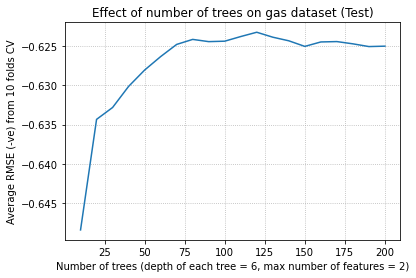

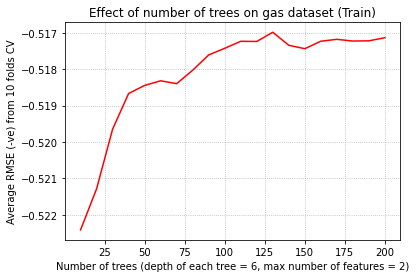

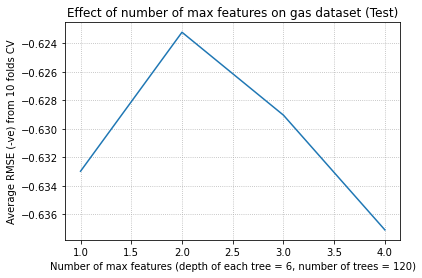

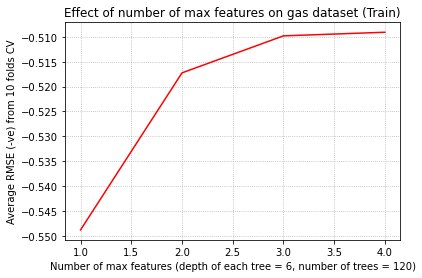

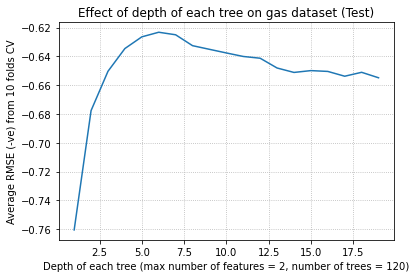

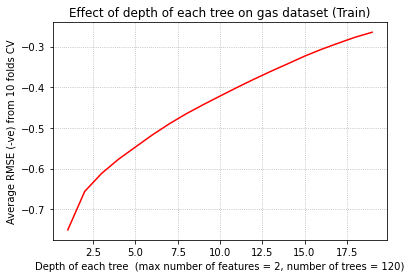

In [ ]:
max_features = np.arange(1,11,1).reshape(10)
n_estimators = np.arange(10, 210, 10).reshape(20)
max_depth = np.arange(1, 20, 1).reshape(19)

gas_score = list((poly_result[(poly_result['param_model__max_depth'] == 6) & (poly_result['param_model__max_features'] == 2)]).mean_test_score)
gas_train = list((poly_result[(poly_result['param_model__max_depth'] == 6) & (poly_result['param_model__max_features'] == 2)]).mean_train_score)
plt.plot(n_estimators,gas_score)
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 6, max number of features = 2)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on gas dataset (Test)')
plt.savefig('Q19a.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(n_estimators,gas_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 6, max number of features = 2)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on gas dataset (Train)')
plt.savefig('Q19b.png',dpi=300,bbox_inches='tight')
plt.show()

gas_score = list((poly_result[(poly_result['param_model__max_depth'] == 6) & (poly_result['param_model__n_estimators'] == 120)]).mean_test_score)
gas_train = list((poly_result[(poly_result['param_model__max_depth'] == 6) & (poly_result['param_model__n_estimators'] == 120)]).mean_train_score)
plt.plot(max_features,gas_score)
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 6, number of trees = 120)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on gas dataset (Test)')
plt.savefig('Q19c.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(max_features,gas_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 6, number of trees = 120)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on gas dataset (Train)')
plt.savefig('Q19d.png',dpi=300,bbox_inches='tight')
plt.show()

gas_score = list((poly_result[(poly_result['param_model__max_features'] == 2) & (poly_result['param_model__n_estimators'] == 120)]).mean_test_score)
gas_train = list((poly_result[(poly_result['param_model__max_features'] == 2) & (poly_result['param_model__n_estimators'] == 120)]).mean_train_score)
plt.plot(max_depth,gas_score)
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree (max number of features = 2, number of trees = 120)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on gas dataset (Test)')
plt.savefig('Q21e.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(max_depth,gas_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree  (max number of features = 2, number of trees = 120)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on gas dataset (Train)')
plt.savefig('Q21f.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
print('OOB, Gas:',RandomForestRegressor(random_state=42,max_depth=6,
                                         max_features=2, n_estimators=120, oob_score=True).fit(XgasCur_FS,y_standard).oob_score_)

OOB, Gas: 0.6640552556148592


In [ ]:
vis_tree = RandomForestRegressor(random_state=42,max_depth=4, max_features=3, n_estimators=10).fit(XgasCur_FS,y_standard)


In [ ]:
chY = SelectKBest(score_func=f_regression, k=4)
XTranscode_Test = chY.fit_transform(df_total.loc[:, df_total.columns != 'CO'], df_total.iloc[:,10])
column_names = df_total.loc[:, df_total.columns != 'CO'].columns[chY.get_support()]


In [ ]:
tree = vis_tree.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = column_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## Q22- 24

## lightgbm


In [ ]:
# First lets define an optimizer for LIGHT GBM
from LightGBM import *
import lightgbm as lgbm

In [ ]:
# First lets define an optimizer for LIGHT GBM


opti_lgbm = BayesSearchCV(
    lgbm.LGBMRegressor(random_state=42,verbose=1,n_jobs=-1),
    {
        'boosting_type': ['gbdt', 'dart'],
        'max_depth': np.arange(1,100,10),
        'num_leaves': np.arange(10,800,10),
        'n_estimators': np.arange(10,800,100),
        'reg_alpha': [10.0**x for x in np.arange(-4,3)],
        'reg_lambda': [10.0**x for x in np.arange(-4,3)],
        'min_split_gain': [10.0**x for x in np.arange(-4,0)],
    },
    n_iter=45,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True,
)

result = opti_lgbm.fit(XgasCur_FS,y_standard)



print('Best parameters (for Gas emission set LightGBM):',opti_lgbm.best_params_,
      ',Test RMSE:',opti_lgbm.best_score_,'training RMSE:',opti_lgbm.cv_results_)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
print('Best parameters (for Gas emission set LightGBM):',opti_lgbm.best_params_,
      ',Test RMSE:',opti_lgbm.best_score_,'training RMSE:',max(opti_lgbm.cv_results_['mean_train_score']))

Best parameters (for Gas emission set LightGBM): OrderedDict([('boosting_type', 'gbdt'), ('max_depth', 21), ('min_split_gain', 0.1), ('n_estimators', 1510), ('num_leaves', 620), ('reg_alpha', 100.0), ('reg_lambda', 10.0)]) ,Test RMSE: -0.6639264140468673 training RMSE: -0.15106172945421367


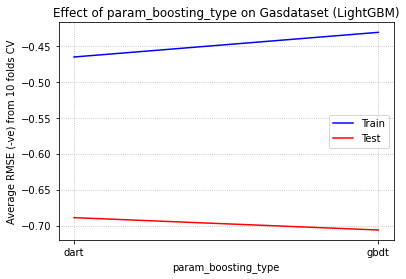

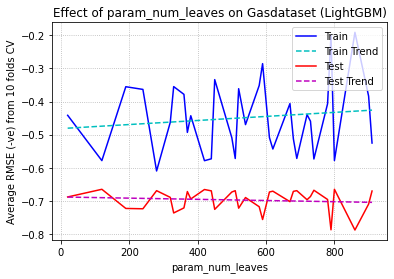

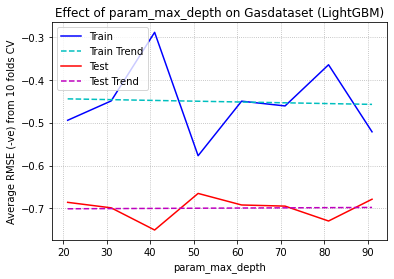

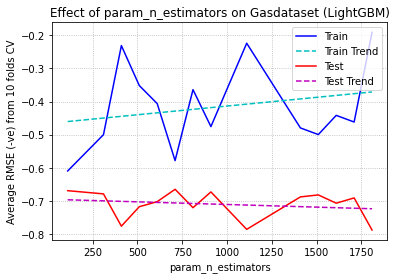

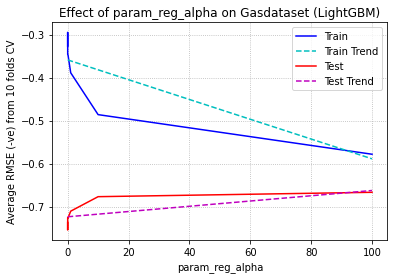

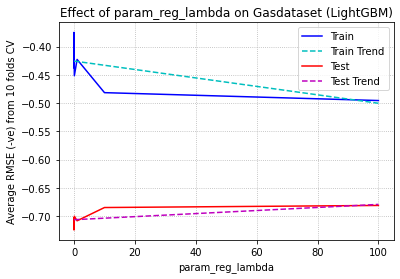

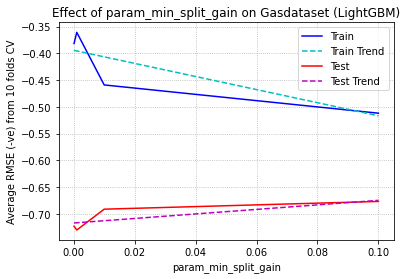

In [ ]:
param_list = ['param_boosting_type','param_num_leaves','param_max_depth','param_n_estimators',
             'param_reg_alpha','param_reg_lambda',
              'param_min_split_gain'] 
for param in param_list:
    param_set = sorted(list(set(opti_lgbm.cv_results_[param])))
    param_trainscore = []
    param_testscore = []
    for item in param_set:
        param_trainscore.append(np.mean([opti_lgbm.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opti_lgbm.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opti_lgbm.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opti_lgbm.cv_results_[param]) 
                                              if x == item]])) 
    plt.plot(param_set,param_trainscore,label="Train",color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE (-ve) from 10 folds CV')
    plt.title("Effect of %s on Gasdataset (LightGBM)" % param)
    plt.savefig('Q22lightgbm'+param+'.png',dpi=300,bbox_inches='tight')
    plt.show()

## catboost

In [ ]:
# Code for catboost
    

opti_catboost= BayesSearchCV(
    CatBoostRegressor(random_state=42,verbose=1,thread_count=-1,bootstrap_type='Bayesian'), 
    {
        'colsample_bylevel': np.arange(0.1,0.5,0.1),
        'num_trees': np.arange(10,200,50),
        'l2_leaf_reg': [10.0**x for x in np.arange(-4,4)],
        'max_depth': np.arange(1,10,2),
        'bagging_temperature': np.arange(0.1,10,1),
        'grow_policy': ['SymmetricTree'],
        'score_function': ['Cosine','L2']
        
    },
    n_iter=40,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

result = opti_catboost.fit(x_standard, y_standard)


# import pickle

# filename = 'light_catboost_param2.sav'
# pickle.dump(opti_catboost, open('/content/gdrive/MyDrive/DataMining/Project 4/'+filename, 'wb'))



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
print('Best parameters (for Gas emission set Catboost):',opti_catboost.best_params_,
      ',Test RMSE:',opti_catboost.best_score_,'training RMSE:',opti_catboost.cv_results_)



Best parameters (for Gas emission set Catboost): OrderedDict([('bagging_temperature', 7.1), ('colsample_bylevel', 0.30000000000000004), ('grow_policy', 'SymmetricTree'), ('l2_leaf_reg', 0.01), ('max_depth', 7), ('num_trees', 160), ('score_function', 'L2')]) ,Test RMSE: -0.6228142564844564 training RMSE: {'mean_fit_time': array([1.36995649, 0.34170756, 0.57194772, 0.18445692, 1.69699655,
       0.99237366, 1.10929766, 0.20073266, 0.64120398, 0.70931292,
       1.9890552 , 1.01947837, 1.33441172, 0.48805671, 1.63321204,
       1.22779751, 1.07805424, 2.76608024, 2.41348543, 1.7496768 ,
       0.75738692, 3.54589052, 0.64534097, 1.234551  , 1.07477155,
       4.27663536, 2.49504838, 0.68501897, 0.94977264, 0.93741851,
       1.75791402, 1.67334876, 1.60992165, 1.72222643, 1.09962087,
       1.24604411, 1.72166681, 0.80454817, 2.2778008 , 1.70844908]), 'std_fit_time': array([0.10770156, 0.05465561, 0.14703506, 0.02593074, 0.42946551,
       0.18144376, 0.24309621, 0.0374286 , 0.14913555, 0

In [ ]:
print('Best parameters (for Gas emission set Catboost):',opti_catboost.best_params_,
      ',Test RMSE:',opti_catboost.best_score_,'training RMSE:',max(opti_catboost.cv_results_['mean_train_score']))



Best parameters (for Gas emission set Catboost): OrderedDict([('bagging_temperature', 7.1), ('colsample_bylevel', 0.30000000000000004), ('grow_policy', 'SymmetricTree'), ('l2_leaf_reg', 0.01), ('max_depth', 7), ('num_trees', 160), ('score_function', 'L2')]) ,Test RMSE: -0.6228142564844564 training RMSE: -0.4151167044505075


In [ ]:
# import pickle
# print('Best parameters (for Gas emission set Catboost):',opti_catboost.best_params_,
#       ',Test RMSE:',opti_catboost.best_score_,'training RMSE:',opti_catboost.cv_results_)
# filename = 'light_catboost_param2.sav'
# pickle.dump(opti_catboost, open('/content/gdrive/MyDrive/DataMining/Project 4/'+filename, 'wb'))


In [ ]:
opti_catboost2= BayesSearchCV(
    CatBoostRegressor(random_state=42,verbose=1,thread_count=-1,bootstrap_type='Bayesian'), 
    {
        'colsample_bylevel': np.arange(0.1,1,0.1),
        'num_trees': np.arange(10,600,100),
        'l2_leaf_reg': [10.0**x for x in np.arange(-3,4)],
        'max_depth': np.arange(2,16,2),
        'bagging_temperature': np.arange(0.1,5,1),
        'grow_policy': ['Lossguide'],
        'score_function': ['Cosine','L2']
        
    },
    n_iter=20,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

result = opti_catboost2.fit(XgasCur_FS,y_standard)


# import pickle
# print('Best parameters (for Gas emission set Catboost):',opti_catboost.best_params_,
#       ',Test RMSE:',opti_catboost.best_score_,'training RMSE:',opti_catboost.cv_results_)
# filename = 'light_catboost_param3.sav'
# pickle.dump(opti_catboost, open('/content/gdrive/MyDrive/DataMining/Project 4/'+filename, 'wb'))



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
print('Best parameters (for Gas emission set Catboost):',opti_catboost2.best_params_,
      ',Test RMSE:',opti_catboost2.best_score_,'training RMSE:',opti_catboost2.cv_results_)



Best parameters (for Gas emission set Catboost): OrderedDict([('bagging_temperature', 3.1), ('colsample_bylevel', 0.7000000000000001), ('grow_policy', 'Lossguide'), ('l2_leaf_reg', 0.1), ('max_depth', 4), ('num_trees', 110), ('score_function', 'L2')]) ,Test RMSE: -0.6529793980481033 training RMSE: {'mean_fit_time': array([ 5.7439878 ,  0.44873643,  3.99648523,  0.26122217, 10.03728848,
        7.35591459,  9.56240387,  0.45280652,  3.01150765,  3.03820662,
       13.78126431, 11.27783189,  6.11023755,  8.69162641,  1.86294851,
        2.77002726,  9.16751237,  3.22561736,  3.39526997,  1.94041643]), 'std_fit_time': array([1.47775087, 0.09426758, 0.89415786, 0.04672662, 2.56265277,
       1.95106791, 2.49807235, 0.07517203, 0.81066108, 0.76048522,
       3.60983476, 2.78248519, 1.57879287, 2.28989883, 0.42062584,
       0.75385028, 2.33345869, 0.73512385, 0.94934601, 0.44563913]), 'mean_score_time': array([0.0843401 , 0.02941613, 0.06811767, 0.02852888, 0.13336496,
       0.07625909, 0.

In [ ]:
print('Best parameters (for Gas emission set Catboost):',opti_catboost2.best_params_,
      ',Test RMSE:',opti_catboost2.best_score_,'training RMSE:',max(opti_catboost2.cv_results_['mean_train_score']))



Best parameters (for Gas emission set Catboost): OrderedDict([('bagging_temperature', 3.1), ('colsample_bylevel', 0.7000000000000001), ('grow_policy', 'Lossguide'), ('l2_leaf_reg', 0.1), ('max_depth', 4), ('num_trees', 110), ('score_function', 'L2')]) ,Test RMSE: -0.6529793980481033 training RMSE: -0.4363789827757099


## analysis

In [ ]:
def join_list(param_set_1,param_set_2,param_score_1,param_score_2):
    names = param_set_1 + param_set_2
    results_values = param_score_1 + param_score_2
    averages = {}
    counts = {}
    for name, value in zip(names, results_values):
        if name in averages:
            averages[name] += value
            counts[name] += 1
        else:
            averages[name] = value
            counts[name] = 1
    for name in averages:
        averages[name] = averages[name]/float(counts[name])
    comb_param_set = list(averages.keys())
    comb_score = list(averages.values())
    return comb_param_set, comb_score

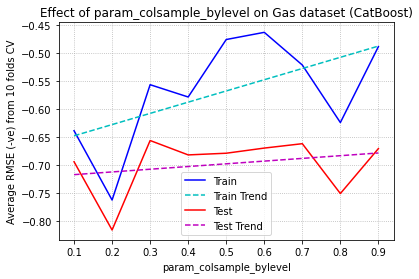

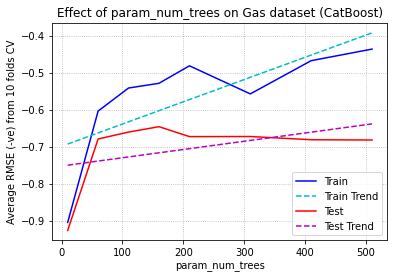

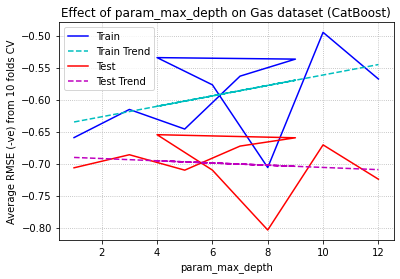

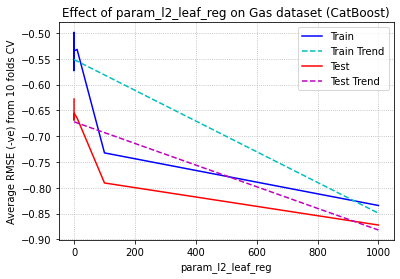

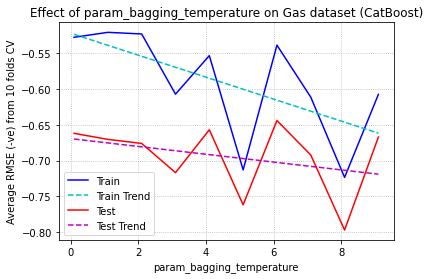

In [ ]:
param_list = ['param_colsample_bylevel','param_num_trees','param_max_depth','param_l2_leaf_reg',
              'param_bagging_temperature'] 
for param in param_list:
    param_set = sorted(list(set(opti_catboost.cv_results_[param])))
    param_set_2 = sorted(list(set(opti_catboost2.cv_results_[param])))
    param_trainscore = []
    param_trainscore_2 = []
    param_testscore = []
    param_testscore_2 = []
    for item in param_set:
        param_trainscore.append(np.mean([opti_catboost.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opti_catboost.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost.cv_results_[param]) 
                                              if x == item]])) 
    for it in param_set_2:
        param_trainscore_2.append(np.mean([opti_catboost2.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost2.cv_results_[param]) 
                                              if x == it]])) 
        param_testscore_2.append(np.mean([opti_catboost2.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost2.cv_results_[param]) 
                                              if x == it]])) 
        
    comb_param_set, comb_trainscore = join_list(param_set,param_set_2,param_trainscore,param_trainscore_2)
    comb_param_set, comb_testscore = join_list(param_set,param_set_2,param_testscore,param_testscore_2)
    
    plt.plot(comb_param_set,comb_trainscore,label="Train",color='b')
    if(type(comb_param_set[0]).__name__ != 'str'):
        plt.plot(comb_param_set,np.poly1d(np.polyfit(comb_param_set,comb_trainscore,1))(comb_param_set),'--',label="Train Trend",color='c')
    plt.plot(comb_param_set,comb_testscore,label="Test",color='r')
    if(type(comb_param_set[0]).__name__ != 'str'):
        plt.plot(comb_param_set,np.poly1d(np.polyfit(comb_param_set,comb_testscore,1))(comb_param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE (-ve) from 10 folds CV')
    plt.title("Effect of %s on Gas dataset (CatBoost)" % param)
    plt.savefig('Q22catboost'+param+'.png',dpi=300,bbox_inches='tight')
    plt.show()

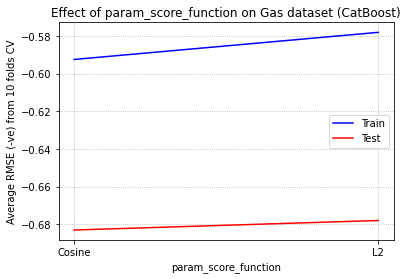

In [ ]:
param_list = ['param_score_function'] 
for param in param_list:
    param_set = sorted(list(set(opti_catboost.cv_results_[param])))
    param_trainscore = []
    param_testscore = []
    for item in param_set:
        param_trainscore.append(np.mean([opti_catboost.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opti_catboost.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost.cv_results_[param]) 
                                              if x == item]])) 
    plt.plot(param_set,param_trainscore,label="Train",color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE (-ve) from 10 folds CV')
    plt.title("Effect of %s on Gas dataset (CatBoost)" % param)
    plt.savefig('Q22catboost'+param+'.png',dpi=300,bbox_inches='tight')
    plt.show()

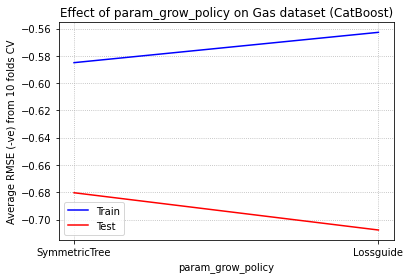

In [ ]:
param_list = ['param_grow_policy'] 
for param in param_list:
    param_set = sorted(list(set(opti_catboost.cv_results_[param])))
    param_trainscore = []
    param_testscore = []
    for item in param_set:
        param_trainscore.append(np.mean([opti_catboost.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opti_catboost.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost.cv_results_[param]) 
                                              if x == item]])) 
    param_trainscore.append(np.mean(opti_catboost2.cv_results_['mean_train_score']))
    param_testscore.append(np.mean(opti_catboost2.cv_results_['mean_test_score']))
    param_set.append('Lossguide')
    plt.plot(param_set,param_trainscore,label="Train",color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE (-ve) from 10 folds CV')
    plt.title("Effect of %s on Gas dataset (CatBoost)" % param)
    plt.savefig('Q22catboost'+param+'.png',dpi=300,bbox_inches='tight')
    plt.show()